# MEDIA CAMPAIGN COST PREDICTION
Machine Learning Model that helps us to predict cost on media campaigns in the food marts on the basis of the features provided.
### DATASET OVERVIEW
store_sales(in millions) - store_sales(in million dollars)

unit_sales(in millions) - unit_sales(in millions) in stores Quantity

Total_children - TOTAL CHILDREN IN HOME

avg_cars_at home(approx) - avg_cars_at home(approx) 

Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS

Gross_weight - gross_weight OF ITEM

Recyclable_package - FOOD ITEM IS recyclable_package

Low_fat - LOW_FAT FOOD ITEM IS LOW FAT

Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES

Store_sqft - STORE AREA AVAILABLE IN SQFT

Coffee_bar - COFFEE BAR available in store

Video_store - VIDEO STORE/gaming store available

Salad_bar - SALAD BAR available in store

Prepared_food - food prepared available in store

Florist - flower shelves available in store

Cost - COST ON ACQUIRING A CUSTOMERS in dollars
 

In [1]:
#importing all relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics as mtr

In [5]:
media=pd.read_csv(r"E:\mediacost_train.csv")
media

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2,1,0,2,6.30,1,0,22,30584,1,1,1,1,1,79.59
1,5.73,3,5,5,3,18.70,1,0,30,20319,0,0,0,0,0,118.36
2,2.62,2,1,1,1,9.21,0,0,9,20319,0,0,0,0,0,67.20
3,11.73,3,1,1,3,10.90,1,1,15,23112,1,1,1,1,1,60.87
4,4.82,2,1,1,3,8.15,0,0,7,38382,0,0,0,0,0,86.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51358,3.70,2,4,4,1,10.40,1,1,18,34452,1,0,0,0,1,147.17
51359,10.36,4,2,0,2,9.43,0,0,20,30797,1,1,1,1,1,92.57
51360,11.19,3,3,0,3,18.50,0,0,5,30797,1,1,1,1,1,92.57
51361,3.78,3,1,1,2,19.80,0,1,8,23598,0,0,0,0,1,135.92


In [6]:
#beginning data exploration and cleaning
media.shape

(51363, 16)

In [7]:
media.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2,1,0,2,6.30,1,0,22,30584,1,1,1,1,1,79.59
1,5.73,3,5,5,3,18.70,1,0,30,20319,0,0,0,0,0,118.36
2,2.62,2,1,1,1,9.21,0,0,9,20319,0,0,0,0,0,67.20
3,11.73,3,1,1,3,10.90,1,1,15,23112,1,1,1,1,1,60.87
4,4.82,2,1,1,3,8.15,0,0,7,38382,0,0,0,0,0,86.79


In [8]:
#let us get a statistical analysis of this data
media.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000
mean,6.531792,3.091194,2.538111,0.832019,2.199424,13.805512,0.558437,0.351148,18.856550,27979.153593,0.612367,0.353776,0.588011,0.588011,0.561825,99.327064
std,3.464902,0.827293,1.489316,1.303775,1.109080,4.622431,0.496578,0.477334,10.263746,5701.145280,0.487215,0.478145,0.492198,0.492198,0.496168,30.023458
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.800000,3.000000,1.000000,0.000000,1.000000,9.700000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,19.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.640000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,30797.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [26]:
def compare(label):
  plt.pie(media[label].value_counts(normalize=True).values,
        labels=media[label].value_counts().index.values,
        autopct="%.2f%%", radius=2)
  plt.show()


In [24]:
media.total_children.value_counts()

2    10709
4    10576
3    10115
1     9943
5     5271
0     4749
Name: total_children, dtype: int64

<IPython.core.display.Javascript object>


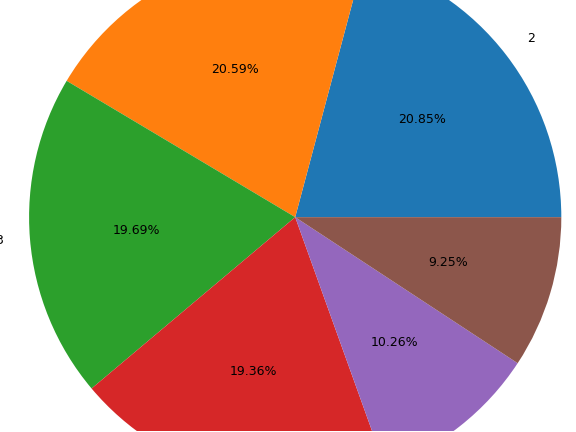

In [27]:
compare('total_children')

In [9]:
#checking whether any of the columns hav null values
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51363 entries, 0 to 51362
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_sales(in millions)    51363 non-null  float64
 1   unit_sales(in millions)     51363 non-null  int64  
 2   total_children              51363 non-null  int64  
 3   num_children_at_home        51363 non-null  int64  
 4   avg_cars_at home(approx).1  51363 non-null  int64  
 5   gross_weight                51363 non-null  float64
 6   recyclable_package          51363 non-null  int64  
 7   low_fat                     51363 non-null  int64  
 8   units_per_case              51363 non-null  int64  
 9   store_sqft                  51363 non-null  int64  
 10  coffee_bar                  51363 non-null  int64  
 11  video_store                 51363 non-null  int64  
 12  salad_bar                   51363 non-null  int64  
 13  prepared_food               513

<IPython.core.display.Javascript object>


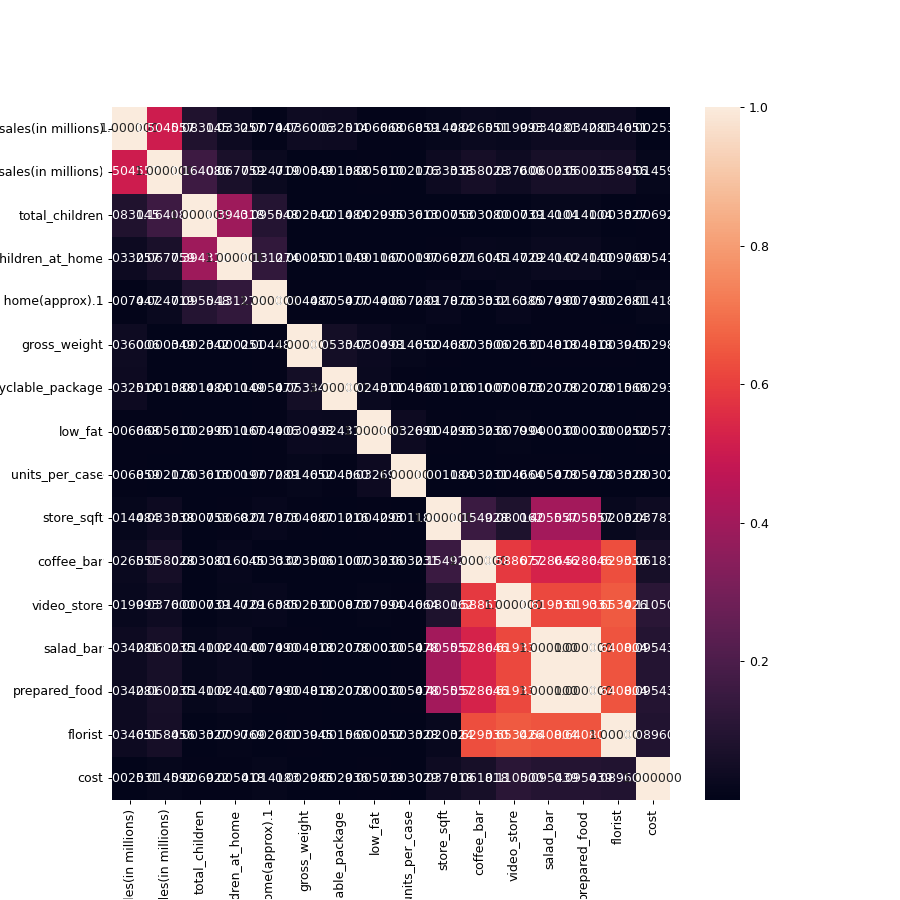

<AxesSubplot:>

In [30]:
media_corr=abs(media.corr())
plt.figure(figsize=(10,10))
sns.heatmap(media_corr,annot=True,fmt='.6f')

In [10]:
#all are non null..
#since this a regression problem..we must observe the correlations of the 'cost' with other columns
media_corr=media.corr()
media_corr['cost'].sort_values(ascending=True)

video_store                  -0.110500
salad_bar                    -0.095439
prepared_food                -0.095439
florist                      -0.089600
coffee_bar                   -0.061818
store_sqft                   -0.037818
unit_sales(in millions)      -0.014592
total_children               -0.006922
num_children_at_home         -0.005418
units_per_case               -0.003029
gross_weight                 -0.002985
recyclable_package           -0.002936
store_sales(in millions)     -0.002531
low_fat                       0.005739
avg_cars_at home(approx).1    0.014183
cost                          1.000000
Name: cost, dtype: float64

In [11]:
#it is evident that the correlations of the cost column are not that significant
#this implies that we cannot use a linear regression model
#also because we have a large amount of data..we cannot use decision tree model as it might overfit on this data and may not work properly for other data
#therefore, random forest regressor seems to be a good option
#firstly though, let us separate the features and target
X=media.drop('cost',axis=1)
y=media['cost']
X.shape

(51363, 15)

In [13]:

#splitting the given train data into train and test sections so we may evaluate our model later
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape

(35954, 15)

In [14]:
#it is a good practice to reset the indices. Therefore,
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

y_train=y_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

X_test.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,7.24,2,0,0,2,19.30,0,0,32,23759,1,0,1,1,1
1,7.24,4,5,3,3,7.70,0,1,17,27694,1,1,1,1,1
2,10.32,4,0,0,0,14.70,1,1,14,21215,1,0,0,0,0
3,9.93,3,3,0,0,17.10,1,0,22,27694,1,1,1,1,1
4,5.43,3,1,0,2,6.27,0,0,3,21215,1,0,0,0,0


In [15]:
#importing the Random Forest Regressor Model and fitting it over the train dataset
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=50,random_state=0,max_depth=8)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=50, random_state=0)

In [16]:
#making predictions on the test features
y_pred=rfr.predict(X_test)

In [17]:
#calculating root mean square error
rmse=np.sqrt(mtr.mean_squared_error(y_test,y_pred))
print(rmse)

29.076695058251413


In [18]:
#loading the actual test data for which we cannot check the accuracy score as we are not given the values of target
test=pd.read_csv(r'E:\mediacost_test.csv')
test.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,2.65,5,4,1,4,6.89,0,1,5,33858,1,0,1,1,1
1,8.34,3,0,0,1,9.71,1,1,28,20319,0,0,0,0,0
2,3.54,2,4,0,2,20.90,1,0,15,30797,1,1,1,1,1
3,5.60,2,3,2,2,11.00,1,0,33,20319,0,0,0,0,0
4,4.80,3,2,0,4,17.40,1,0,36,30268,0,0,0,0,0


In [19]:
test.shape

(9065, 15)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9065 entries, 0 to 9064
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_sales(in millions)    9065 non-null   float64
 1   unit_sales(in millions)     9065 non-null   int64  
 2   total_children              9065 non-null   int64  
 3   num_children_at_home        9065 non-null   int64  
 4   avg_cars_at home(approx).1  9065 non-null   int64  
 5   gross_weight                9065 non-null   float64
 6   recyclable_package          9065 non-null   int64  
 7   low_fat                     9065 non-null   int64  
 8   units_per_case              9065 non-null   int64  
 9   store_sqft                  9065 non-null   int64  
 10  coffee_bar                  9065 non-null   int64  
 11  video_store                 9065 non-null   int64  
 12  salad_bar                   9065 non-null   int64  
 13  prepared_food               9065 

In [21]:
#now we can make predictions on this data
predictions=(rfr.predict(test))

In [22]:
#the the data type of the 'predictions' is a numpy array, we must convert it into a dataframe
predictions_df=pd.DataFrame(predictions)
predictions_df.index=test.index
predictions_df.columns=['cost']
predictions_df.head()

,cost
0,98.933589
1,102.651682
2,89.193045
3,109.754980
4,94.011034
